# Trusted zone - Nationalities

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import os, sys
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)


from utils import DBtable_to_df

In [2]:
df = DBtable_to_df('../../nationalities.duckdb','nationalitiesClean')

## Data profiling


In [3]:
df.head()

,Afganistán,Albania,Alemania,Andorra,Angola,Antigua_y_Barbuda,Arabia_Saudita,Argelia,Argentina,Armenia,...,Uganda,Uruguay,Uzbekistán,Vanuatu,Venezuela,Vietnam,Year,Yemen,Zambia,Zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,0.0,0.0,0.0
1,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,3.0,0.0,0.0,3.0,0.0,2018,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,2018,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,2018,0.0,0.0,0.0


The enitire dataframe could conatain `float64` type values. However, we are already interested in section and year being string type values, since section is a code and year is the version of the dataset.


In [4]:
df.dtypes


Afganistán    float64
Albania       float64
Alemania      float64
Andorra       float64
Angola        float64
               ...   
Vietnam       float64
Year           object
Yemen         float64
Zambia        float64
Zimbabwe      float64
Length: 193, dtype: object

In the plots below, we can verify with the kernel density estimation, there are variables that do not follow the Gaussian curve so that it does not adapt a random variable to a function that depends on the mean and the standard deviation.


In [5]:
## get index of column by name
yIndex = df.columns.tolist().index('Year')
msIndex = df.columns.tolist().index('Madrid_section')

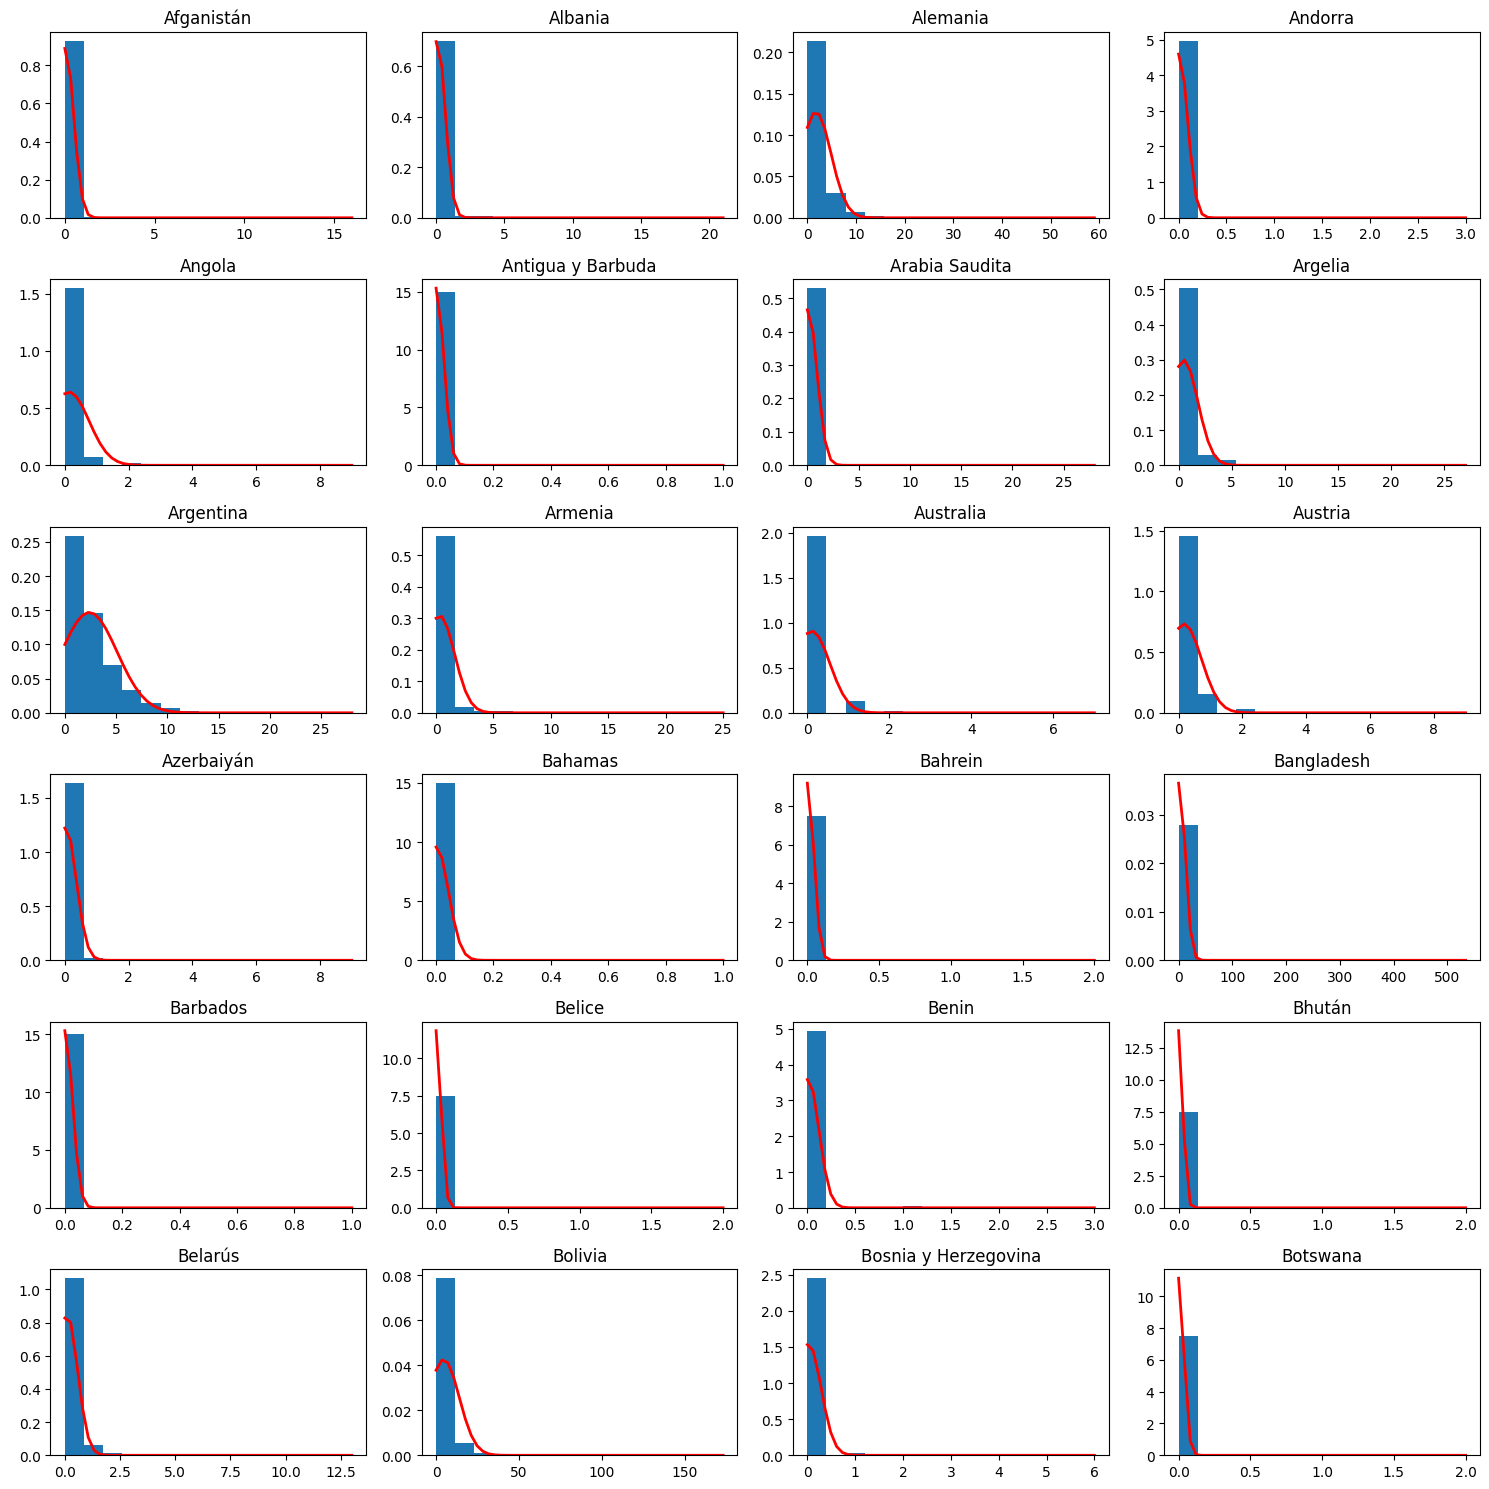

In [6]:
def gaussianity_plot(df):    
    fig, axes = plt.subplots(6, 4, figsize=(15, 15))

    # We skip section feature and year
    for i, c in enumerate(df.columns[0:24]):
        ax = axes.reshape(-1)[i]

        count, bins, ignore = ax.hist(df[c], 15, density=True)
        sigma = df[c].std()
        mu = df[c].mean()
        dbins = np.linspace(bins[0], bins[-1])
        ax.plot(dbins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (dbins - mu)**2
                                                            / (2 * sigma**2)), linewidth=2, color='red')
        c = c.replace('_', ' ')
        title = f'{c[:35]}-\n{c[35:]}' if len(c) > 35 else c
        t = ax.set_title(title)

    plt.tight_layout()

gaussianity_plot(df)

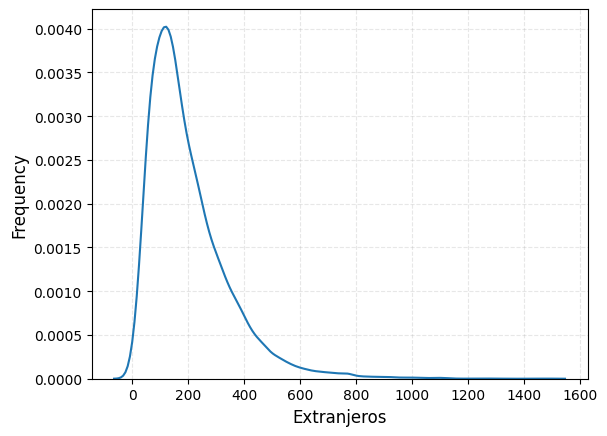

In [7]:
extranjeros = (df.drop(['Madrid_section', 'Year', 'Españoles'], axis = 1)).sum(axis = 1)
sns.kdeplot(data = extranjeros)
plt.xlabel("Extranjeros", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()

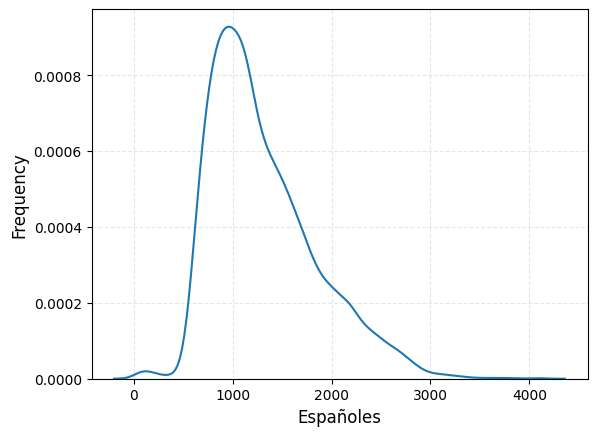

In [8]:
sns.kdeplot(data = df['Españoles'])
plt.xlabel("Españoles", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()

In [9]:
# get only numerical
df2 = df.drop(df.columns[[yIndex, msIndex]],axis = 1)

In [10]:
df2.describe()


,Afganistán,Albania,Alemania,Andorra,Angola,Antigua_y_Barbuda,Arabia_Saudita,Argelia,Argentina,Armenia,...,Ucrania,Uganda,Uruguay,Uzbekistán,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
count,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,...,13248.000000,13248.000000,13248.000000,13248.000000,8831.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000
mean,0.044460,0.101600,1.760719,0.006793,0.135643,0.000679,0.081522,0.479242,2.385341,0.314387,...,5.365338,0.008605,0.443539,0.019550,0.000226,9.834088,0.100694,0.020456,0.001661,0.007171
std,0.446657,0.563158,3.115786,0.086618,0.622740,0.026056,0.853501,1.332202,2.713793,1.292317,...,8.188925,0.121333,0.967805,0.225889,0.015048,10.466651,0.585917,0.298894,0.045945,0.116671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,7.000000,0.000000,1.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,21.000000,59.000000,3.000000,9.000000,1.000000,28.000000,27.000000,28.000000,25.000000,...,108.000000,4.000000,13.000000,6.000000,1.000000,228.000000,14.000000,14.000000,2.000000,5.000000


Observing the correlation heatmap we can know those variable that are linearly related.
As there are 193 numerical variables, we decided to first visualise correlation between first 20 variables.

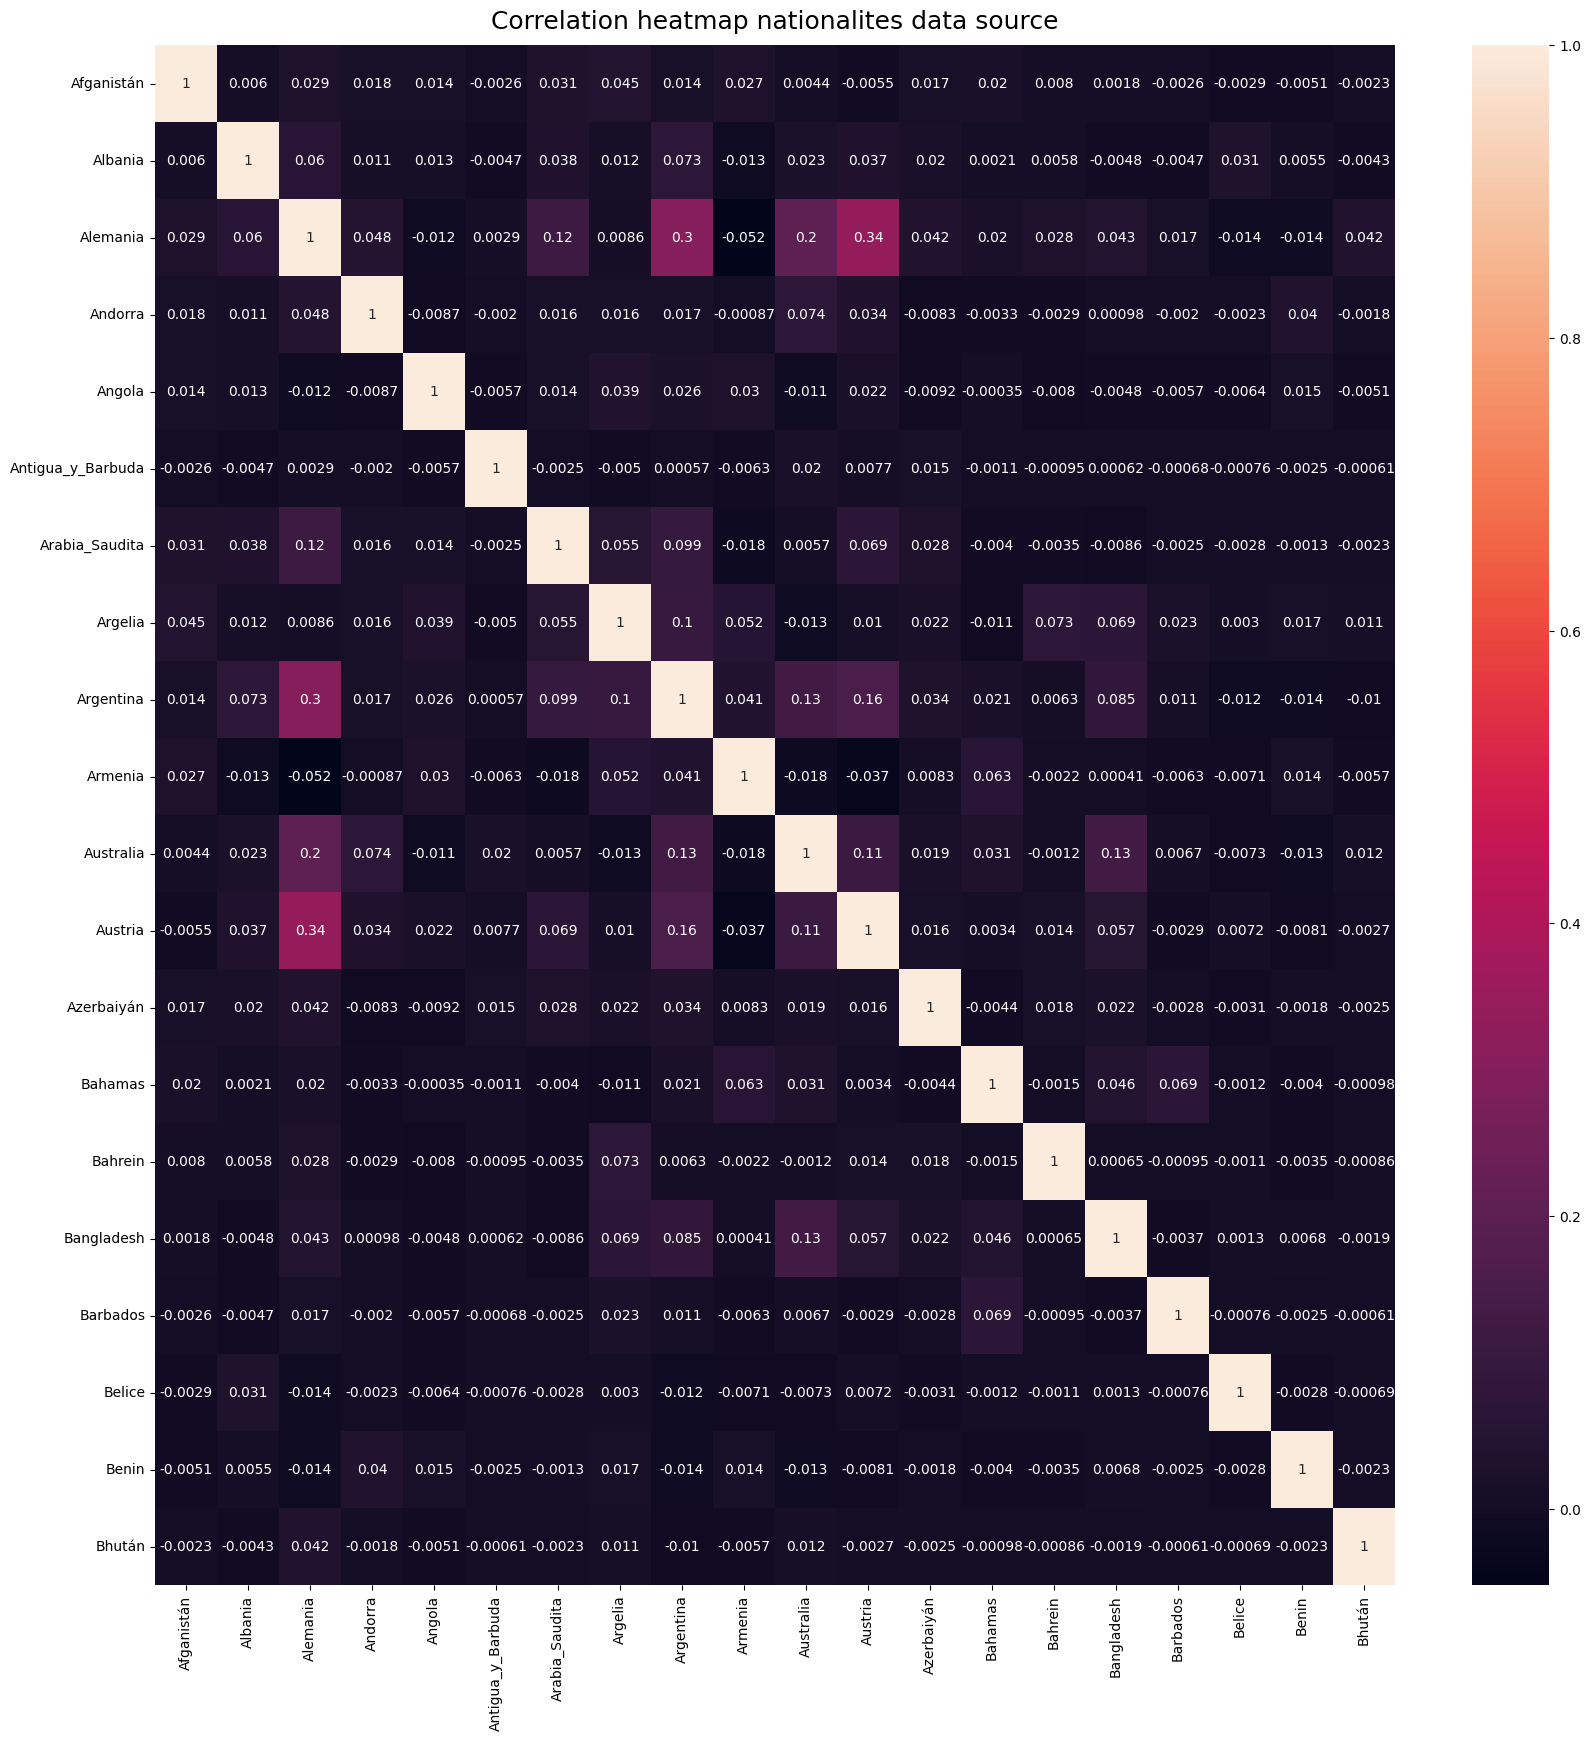

In [11]:
def corr_plot(df2):
    plt.figure(figsize=(20, 20))
    ax=sns.heatmap(df2.iloc[:,0:20].corr(), annot=True)
    ax.set_title('Correlation heatmap nationalites data source', fontdict={'fontsize':18}, pad=12)
    
corr_plot(df2)

In [12]:
def get_redundant_pairs(df2):
    """
    Get diagonal and lower triangular pairs of correlation matrix
    """
    pairs_to_drop = set()
    cols = df2.columns
    for i in range(0, df2.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_correlations(df2):
    au_corr = df2.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df2)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

corrplot = get_correlations(df2)
corrplot[:10] # show the top 10 absolute correlation

Alemania           Reino_Unido             0.616295
Ecuador            Perú                    0.611665
Honduras           Perú                    0.609840
Guinea_Ecuatorial  Nigeria                 0.580830
Ecuador            República_Dominicana    0.571294
Italia             Reino_Unido             0.567334
Bolivia            China                   0.562092
Colombia           Perú                    0.550310
Ecuador            Honduras                0.526865
Países_Bajos       Reino_Unido             0.524438
dtype: float64